<a href="https://colab.research.google.com/github/Prajjwal009/Research_Notebook/blob/main/LSTM_Implementation_for_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/AMZN_data.csv")

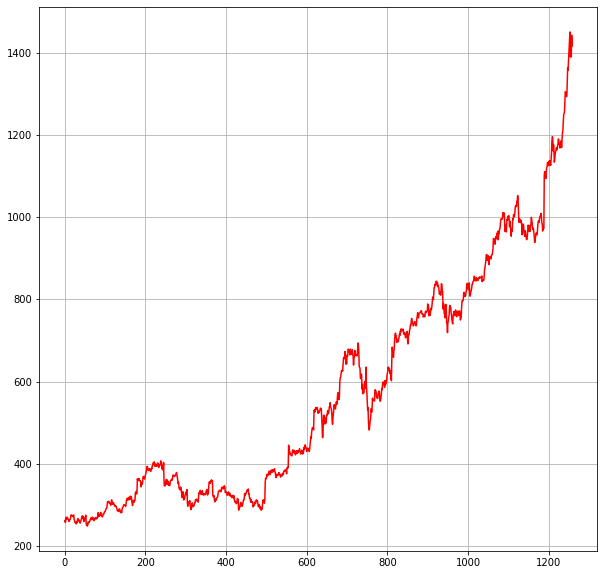

In [3]:
from matplotlib import pyplot as plt


plt.figure(figsize = (10,10))

plt.plot(data["close"],color = 'red')
plt.grid()

In [4]:
data.shape


(1259, 7)

In [5]:
train_data = data[0:1000]
test_data = data[1000:1259]


In [6]:
#importing libraries


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data['close'].values.reshape(-1,1))

In [10]:
prediction_days = 100

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x,0])
    y_train.append(scaled_data[x, 0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    

In [11]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [12]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [13]:
model.fit(x_train, 
          y_train, 
          epochs=25, 
          batch_size = 32)

Epoch 1/25
29/29 [==============================] - 16s 283ms/step - loss: 0.0473
Epoch 2/25
29/29 [==============================] - 7s 251ms/step - loss: 0.0061
Epoch 3/25
29/29 [==============================] - 4s 150ms/step - loss: 0.0045
Epoch 4/25
29/29 [==============================] - 4s 151ms/step - loss: 0.0046
Epoch 5/25
29/29 [==============================] - 4s 151ms/step - loss: 0.0042
Epoch 6/25
29/29 [==============================] - 4s 149ms/step - loss: 0.0043
Epoch 7/25
29/29 [==============================] - 4s 150ms/step - loss: 0.0041
Epoch 8/25
29/29 [==============================] - 4s 151ms/step - loss: 0.0046
Epoch 9/25
29/29 [==============================] - 4s 152ms/step - loss: 0.0047
Epoch 10/25
29/29 [==============================] - 4s 151ms/step - loss: 0.0044
Epoch 11/25
29/29 [==============================] - 4s 152ms/step - loss: 0.0036
Epoch 12/25
29/29 [==============================] - 4s 151ms/step - loss: 0.0034
Epoch 13/25
29/29 [=====

In [14]:
actual_price = test_data["close"].values
total_dataset = pd.concat((train_data['close'], test_data['close']), axis=0)

In [15]:
total_dataset

0        261.95
1        257.21
2        258.70
3        269.47
4        269.24
         ...   
1254    1390.00
1255    1429.95
1256    1390.00
1257    1442.84
1258    1416.78
Name: close, Length: 1259, dtype: float64

In [16]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [17]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

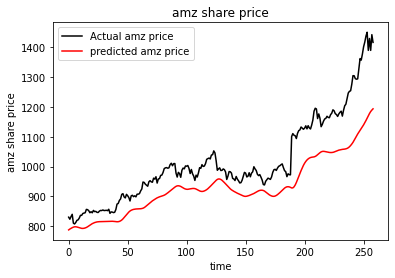

In [18]:
plt.plot(actual_price, color='black', label=f"Actual amz price")
plt.plot(predicted_prices, color= 'red', label=f"predicted amz price")
plt.title(f"amz share price")
plt.xlabel("time")
plt.ylabel(f"amz share price")
plt.legend()
plt.show()